In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
import numpy as np

In [3]:
file = open("tagPairsNewSorted.csv", 'r')
#file = open("", 'r')
line = file.readline().strip()
print(line)
i, j = 0, 0
data = []
label = []

FileNotFoundError: ignored

In [ ]:
tag_dict={}
for k in range(len(label)):
  tag_dict[k]=[k]
tag_dict
while i < 500:
    line = file.readline().strip().split(',')
    count = int(line[0])
    u, v = line[1][1:], line[2][:-1]
    if u not in label:
        label.append(u)
  
    if v not in label:
        label.append(v)
    
    m, n = label.index(u), label.index(v)
    if u not in tag_dict:
      tag_dict[u]=[(label.index(v),count)]
    else:
      tag_dict[u].append((label.index(v), count))
    
    if v not in tag_dict:
      tag_dict[v]=[(label.index(u), count)]
    else:
      tag_dict[v].append((label.index(u), count))

    data.append(((m, n), float(line[0])))
    i += 1

In [ ]:
encoded_array=np.zeros((len(label),len(label)))

In [ ]:
for key in tag_dict.keys():
  m=label.index(key) 
  val=tag_dict[key]
  for i in val:
    encoded_array[m][i[0]]= i[1]

In [ ]:
maxVal = np.max(encoded_array) + 10.0

for i in  range(len(label)):
  encoded_array[i][i] = maxVal

encoded_array = 1.0 - encoded_array/np.max(encoded_array)


In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, metric='euclidean', perplexity = 50)
reduced_dims_tsne = tsne_model.fit_transform(encoded_array)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

In [ ]:
def cut_tree(Z, num_of_clusters, distance_matrix):
   iteration_number = distance_matrix.shape[0] - num_of_clusters
   clusters_label  = clusters[iteration_number]
   return clusters_label

In [ ]:
def hierarchical_clustering(data,linkage):  
    #form distance matrix from data
    initial_distances = pairwise_distances(data, metric='euclidean')
    #making all the diagonal elements infinity 
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    return (clusters, initial_distances)

In [ ]:
#Code Source: https://github.com/hhundiwala/hierarchical-clustering

def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

In [ ]:
(clusters, distance_matrix)= hierarchical_clustering(reduced_dims_tsne,"average")

In [ ]:
distance_matrix

array([[9.223372e+18, 9.223372e+18, 9.223372e+18, ..., 9.223372e+18,
        9.223372e+18, 9.223372e+18],
       [9.223372e+18, 9.223372e+18, 9.223372e+18, ..., 9.223372e+18,
        9.223372e+18, 9.223372e+18],
       [9.223372e+18, 9.223372e+18, 9.223372e+18, ..., 9.223372e+18,
        9.223372e+18, 9.223372e+18],
       ...,
       [9.223372e+18, 9.223372e+18, 9.223372e+18, ..., 9.223372e+18,
        9.223372e+18, 9.223372e+18],
       [9.223372e+18, 9.223372e+18, 9.223372e+18, ..., 9.223372e+18,
        9.223372e+18, 9.223372e+18],
       [9.223372e+18, 9.223372e+18, 9.223372e+18, ..., 9.223372e+18,
        9.223372e+18, 9.223372e+18]], dtype=float32)

In [ ]:
cluster_labels=cut_tree(clusters,20 , distance_matrix)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

print(silhouette_score(reduced_dims_tsne, cluster_labels))
print(davies_bouldin_score(reduced_dims_tsne, cluster_labels))

0.31026524

In [ ]:

from collections import defaultdict

cluster_dict = defaultdict(list)

for i in range(len(cluster_labels)):
  cluster_dict[cluster_labels[i]].append(label[i]) 



In [ ]:
cluster_dict

defaultdict(list,
            {0: ['python', 'python3'],
             2: ['ruby-on-rails',
              'rails-activerecord',
              'apache',
              'windows',
              'bash',
              'shellscript',
              'devise',
              'nginx',
              'batch-file',
              'windows-10',
              'linq',
              'capistrano',
              'unicorn',
              'sh',
              'bootstrap',
              'google-app-engine',
              'google-cloud',
              '.htaccess'],
             3: ['ruby',
              'c++',
              'c',
              'rubygems',
              'opencv',
              'アルゴリズム',
              'c++11',
              'データ構造',
              'bundler',
              'ポインタ',
              'boost',
              'gcc',
              'mfc',
              'rbenv'],
             4: ['swift',
              'xcode',
              'ios',
              'objective-c',
              'swift3',
           

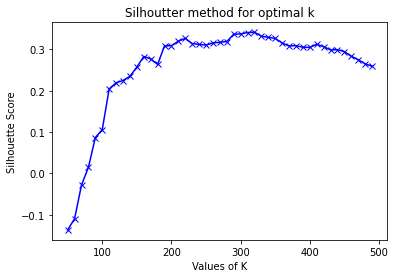

In [ ]:
#Silhouette Method for Finding Optimal Number of Clusters
(clusters, distance_matrix)= hierarchical_clustering(reduced_dims_tsne,"average")
#(clusters, distance_matrix)= hierarchical_clustering(reduced_dims_tsne,"single")
#(clusters, distance_matrix)= hierarchical_clustering(reduced_dims_tsne,"complete")
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
k_range=list(range(50 , 500 , 10))
silhouette_avg=[]
Sum_of_squared_distances=[]
for num_clusters in k_range:
 
  cluster_labels= cut_tree(clusters, num_clusters, distance_matrix)
  silhouette_avg.append(silhouette_score(reduced_dims_tsne, cluster_labels))

plt.plot(k_range,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhoutter method for optimal k')
plt.show()